# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [13]:
#importer vos librairies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
#charger les données dans le drive : 2 datasets
    #price_availability.csv
    #listings_final.csv
price=pd.read_csv('price_availability.csv', sep=';')
listing=pd.read_csv('listings_final.csv', sep=';')

In [5]:
print(price.shape, listing.shape, len(price.listing_id.unique()), len(listing.listing_id.unique()))

(4748696, 7) (1000, 19) 11749 1000


In [6]:
# price.sort_values('listing_id').head(7)
# price.describe()
price.head()

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


In [7]:
listing.head(2)

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69


In [8]:
#vérifier si tous les individus ont bien un prix 
#On utilise la méthode isnull() qui renvoie True s'il y a des valeurs None ou NaN,
# et on combine les résultats des différentes lignes
price.local_price.isnull().any()

False

## Données d'entrée

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [48]:
#définir 2 variables de travail :
#X := les features à utiliser 
#Y := la target (prix)


In [ ]:
#construire l'ensemble de donnée prix 
#
#    INDICE 
# 
# récupérer les prix des ID dans le dataset de prix 
# 🚧 il y a plusieurs prix dans le dataset 🚧



In [9]:
#On va ajouter le prix au dataframe 'listing' au lieu de le manipuler à part. 
#Comme 'local_price' indique plusieurs prix par 'listing_id', on moyenne les différentes lignes. 
#Avant de moyenner, on vérifie que tous les prix sont en euros.
price2=price[['listing_id', 'local_price']].groupby('listing_id').mean()
print(listing.shape)
listing=pd.merge(listing, price2, how='inner', on='listing_id')
print(listing.shape)  #On voit en regardant le résultat que l'une des lignes n'a pas de prix correspondant

feat=['person_capacity', 'beds', 'bedrooms', 'bathrooms']
x=listing[feat]
y=listing['local_price']

(1000, 19)
(999, 20)


En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10, 20$ ou $30\%$.

In [ ]:
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
#zafficher la shape de vos données 


((699, 4), (699,), (300, 4), (300,))

In [10]:
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
#zafficher la shape de vos données 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(699, 4) (699,) (300, 4) (300,)


## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [ ]:
#créer l'objet de régression et entrainer le sur notre ensemble d'entraînement


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
regr=LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)

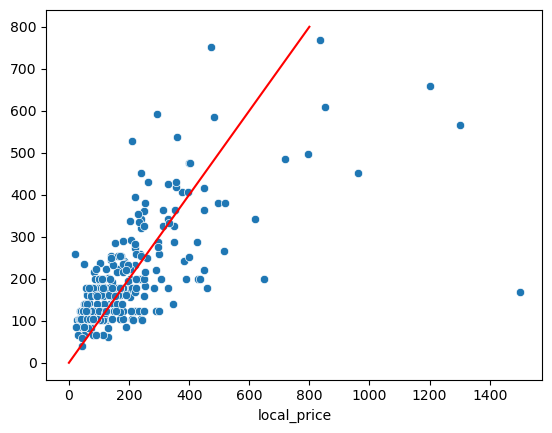

In [14]:
sns.scatterplot(x=y_test, y=pred)
plt.plot([0,800],[0,800], color='red')

In [15]:
#afficher les coefficients
print(feat)
print(regr.coef_)

#que remarquez vous ? 
#
#ça ne m'évoque rien avec certitude. 
#Je suppose que cela signifie que le prix augmente de 38€ par personne, de 20 par chambre,
# de 88 par salle de bains, et baisse de 21 par lit, mais ça n'a pas vraiment de sens que
# le prix baisse avec le nombre de lits (toutes choses égales par ailleurs).


['person_capacity', 'beds', 'bedrooms', 'bathrooms']
[ 38.28168742 -21.48146344  20.21008209  88.9106011 ]


## Validation du modèle

### Le coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [ ]:
#faire une prediction sur X


taille du vecteur Y_pred : 999 


In [16]:
#On utilise toutes les données si le vecteur attendu est de taille 999
y_pred=regr.predict(x)
y_pred.shape

(999,)

In [ ]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2


Mean squared error: 21320.77
R2 : 0.37


In [69]:
#Je suppose ici que "l'ensemble d'entrainement" se réfère à l'ensemble demandé en question
# précédente, soit toutes les données :
print("Mean squared error:", mean_squared_error(y_pred, y) )
print("R2 all :", r2_score(y, y_pred) )
print("R2 train:", r2_score(y_train, regr.predict() )
print("R2 test:", r2_score(y_test, regr.predict()) )

#J'obtiens une erreur moyenne comparable, mais un R2 beaucoup moins bon. Je ne vois pas d'où ça peut venir.


Mean squared error: 20895.03518949932
R2 : 0.3850551714780266


In [68]:
print("R2 :", regr.score(x_test, y_test) )

R2 : 0.461515323314056


## Bonus : Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

In [18]:
X_train=x_train
Y_pred=y_pred

In [58]:
#analyser le code ci-dessous 
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
# p = X_train.shape[1]
p = 4
# 
residuals = np.abs(y_train - Y_pred).values
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T)).values
std_hat = np.dot(residuals, residuals) / (n - p)

La ligne suivante ne tournait pas si je ne rajoutais pas .values à residuals et H en case précédente, vu que l'indice 'i' était alors un indice dans le dataframe de départ (qui n'est pas forcément dans l'intervalle d'entrainement).

In [52]:
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])


0.949928469241774


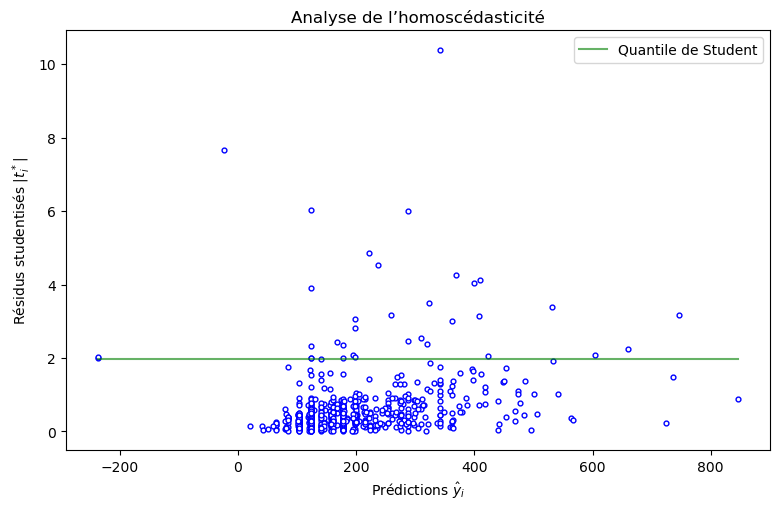

In [64]:
#standart_residuals
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
#Inutilisé :
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), 
                                      scipy.stats.t.ppf(q=0.975, df=n-p-1)], 
         color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()

In [65]:
#On trace le quantile à 97.5% de la distribution des résidus qui suivent la loi de student avec les
# degrés de libertés. On devrait donc avoir 97.5% des points en dessous de cette droite. On en a seulement
# 95% donc le bruit ne suit pas l'hypothèse H
print( np.sum(student_residuals < scipy.stats.t.ppf(q=0.975, df=n-p-1)) / student_residuals.size )


0.949928469241774
